# Assignment 4

**Name Surname**: Emre Girgin \
**Student ID**: 2016400099

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [2]:
A = np.array([
    [1, 6],
    [0, -1],
    [-1, -2]
])

### a.

For a matrix
$A \in \mathbb{R}^{mxn}$
we can obtain a symmetric, positive semidefinite matrix
$A^{T}A \in \mathbb{R}^{nxn}$.
Then if we apply **Eigendecomposition** to $A^{T}A$ we obtain,
$A^{T}A = PDP^{T} = P
\begin{bmatrix}
\lambda_{1} & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \lambda_{n} 
\end{bmatrix}P^{T}$


Then wrote $A^{T}A$ in terms of **Singular Value Decomposition** and we obtain \
$A^{T}A = (U\Sigma V^{T})^{T}(U\Sigma V^{T}) = V\Sigma^{T}U^{T}U\Sigma V^{T}$

Since $U^{T}U = I$

$A^{T}A = V\Sigma^{T}\Sigma V^{T} = V
\begin{bmatrix}
\sigma_{1}^{2} & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \sigma_{n}^{2} 
\end{bmatrix}V^{T}$ \
Thus $V^{T} = P^{T}$ and $\sigma_{i}^{2} = \lambda_{i}$

Then we can calculate the columns of the $U$ matrix by
$ u_{i} = \frac{Av_{i}}{\| Av_{i} \|} = \frac{1}{\sqrt{\lambda_{i}}}Av_{i} = \frac{1}{\sigma_{i}}Av_{i}$

Similarly,
$AA^{T} = U
\begin{bmatrix}
\sigma_{1}^{2} & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \sigma_{n}^{2} 
\end{bmatrix}U^{T}$

In [3]:
sigma_sqr, _ = np.linalg.eig(A.T @ A)
sigma_sqr, U = np.linalg.eig(A @ A.T)

In [4]:
sigma_sqr = sigma_sqr[sigma_sqr > 0.000001]

In [5]:
sigma = np.zeros_like(A, dtype="float32")
for i, eigenvalue in enumerate(np.sqrt(sigma_sqr)):
    sigma[i,i] = eigenvalue

In [6]:
V = np.zeros(shape=(A.shape[1], A.shape[1]))

for i, sgm in enumerate(np.sqrt(sigma_sqr)):
    V[:,i] = (1/sgm * A.T @ U[:,i])

In [7]:
print("Matrices calculated:")
print("U matrix: \n{}\n".format(U))
print("Sigma matrix: \n{}\n".format(sigma))
print("V.T matrix: \n{}\n".format(V.T))

Matrices calculated:
U matrix: 
[[-0.93180061  0.2760291  -0.23570226]
 [ 0.15035942 -0.2974948  -0.94280904]
 [ 0.33036293  0.9139501  -0.23570226]]

Sigma matrix: 
[[6.5251236 0.       ]
 [0.        0.6502008]
 [0.        0.       ]]

V.T matrix: 
[[-0.19343136 -0.98111381]
 [-0.98111381  0.19343136]]



In [8]:
print("Matrices numpy found:")
u, s, v_t = np.linalg.svd(A)
print("U matrix: \n{}\n".format(u))
print("Sigmas: \n{}\n".format(s))
print("V.T matrix: \n{}\n".format(v_t))

Matrices numpy found:
U matrix: 
[[ 0.93180061 -0.2760291   0.23570226]
 [-0.15035942  0.2974948   0.94280904]
 [-0.33036293 -0.9139501   0.23570226]]

Sigmas: 
[6.52512367 0.65020081]

V.T matrix: 
[[ 0.19343136  0.98111381]
 [ 0.98111381 -0.19343136]]



In [9]:
print("Reconstructed matrix I found:")
A_const = U @ sigma @ V.T
print(np.round(A_const))

Reconstructed matrix I found:
[[ 1.  6.]
 [-0. -1.]
 [-1. -2.]]


In [10]:
print("Reconstructed matrix Numpy found:")
print(np.round(u @ sigma @ v_t))

Reconstructed matrix Numpy found:
[[ 1.  6.]
 [-0. -1.]
 [-1. -2.]]


### b.

Theorem 4.14 says, we can always construct a symmetric, positive semidefinite matrix $S \in \mathbb{R}^{nxn}$ defined $ S = A^{T}A$ where $A \in \mathbb{R}^{mxn}$

In addition, Theorem 4.15 says the eigenvectors of a symmetric matrix can be **diagonalized**. Thus we can *diagonalize* the matrix $S$ all the time and by using the steps mentioned in *section a*, we can always have $U, \Sigma $ and $V$ matrices

### c.

Eckart-Young Theorem says 
$\| A - \hat{A}(k)\|_{2} = \sigma_{k+1}$
which is $k = 1$ in our case.

In [11]:
k = 1
s_1 = sigma[k-1,k-1]
u_1 = U[:, k-1:k]
v_1 = V.T[:, k-1:k]

A_hat = s_1 * u_1.dot(v_1.T)
print("Approximated matrix: \n{}".format(A_hat))

Approximated matrix: 
[[ 1.17608475  5.96528397]
 [-0.18977818 -0.9625843 ]
 [-0.41697204 -2.11494677]]


In [12]:
norm = np.linalg.norm(A - A_hat)
print("Difference Norm: {}".format(norm))
print("Sigma k+1 (K=1): {}".format(sigma[1,1]))

Difference Norm: 0.6502008087060592
Sigma k+1 (K=1): 0.6502007842063904


## Question 2

### a.

In [13]:
radians = np.arange(0, 2*np.pi, np.pi/6)
xs = np.sin(radians)
ys = np.cos(radians)
data = np.array(list(zip(ys, xs)))
print(np.round(data, 3))

[[ 1.     0.   ]
 [ 0.866  0.5  ]
 [ 0.5    0.866]
 [ 0.     1.   ]
 [-0.5    0.866]
 [-0.866  0.5  ]
 [-1.     0.   ]
 [-0.866 -0.5  ]
 [-0.5   -0.866]
 [-0.    -1.   ]
 [ 0.5   -0.866]
 [ 0.866 -0.5  ]]


### b.

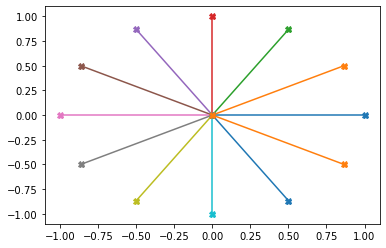

In [14]:
for vec in data:
    plt.plot((0, vec[0]), (0, vec[1]), "X-")
    
plt.show()

### c.

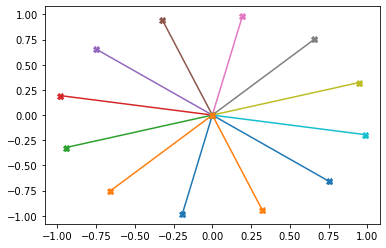

In [15]:
for vec in data:
    vec = V.T @ vec
    plt.plot((0, vec[0]), (0, vec[1]), "X-")
    
plt.show()

### d.

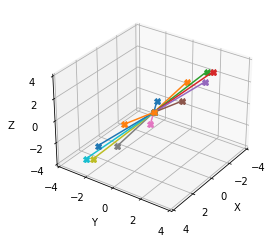

In [16]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vec in data:
    vec = V.T @ vec
    vec = sigma @ vec
    ax.plot((0, vec[0]), (0, vec[1]), (0, vec[2]), "X-")
    
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=30., azim=35)
plt.show()

### e.

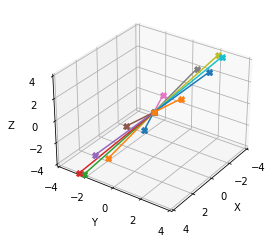

In [17]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vec in data:
    vec = V.T @ vec
    vec = sigma @ vec
    vec = U @ vec
    ax.plot((0, vec[0]), (0, vec[1]), (0, vec[2]), "X-")
    
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=30., azim=35)
plt.show()

### f.

In [18]:
sigma_hat = sigma
sigma_hat[k,k] = 0
print("Sigma hat: \n{}".format(sigma_hat))

Sigma hat: 
[[6.5251236 0.       ]
 [0.        0.       ]
 [0.        0.       ]]


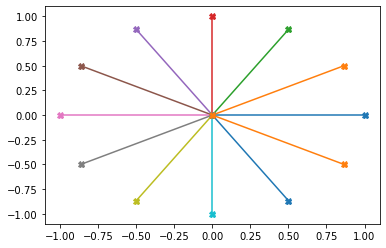

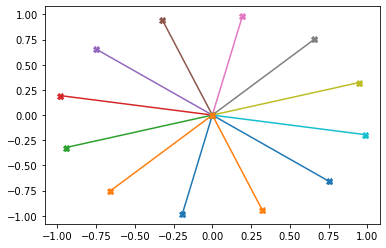

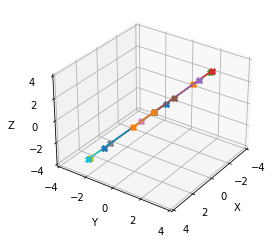

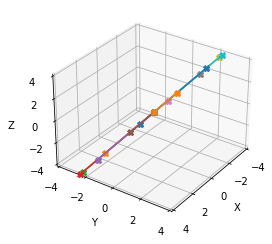

In [19]:
for vec in data:
    plt.plot((0, vec[0]), (0, vec[1]), "X-")
    
plt.show()

for vec in data:
    vec = V.T @ vec
    plt.plot((0, vec[0]), (0, vec[1]), "X-")
    
plt.show()

from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vec in data:
    vec = V.T @ vec
    vec = sigma_hat @ vec
    ax.plot((0, vec[0]), (0, vec[1]), (0, vec[2]), "X-")
    
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=30., azim=35)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vec in data:
    vec = V.T @ vec
    vec = sigma_hat @ vec
    vec = U @ vec
    ax.plot((0, vec[0]), (0, vec[1]), (0, vec[2]), "X-")
    
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=30., azim=35)
plt.show()

### g.

Rank-k approximation of a matrix is the **projection** of the full rank matrix onto a **lower dimensional space of rank at most k**. Obviously, this projection creates an error between the original matrix and its projection. SVD allow us to minimize this error.  

We can see the reduction of the dimension by comparing **2.e** and **2.f**'s last figure. Since **k=1**, the resulting vectors live on the same line, which is 1-dimensional.

## Question 3

### a.

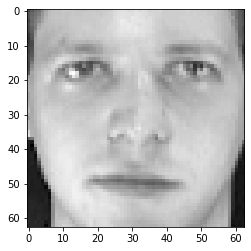

In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
A_1 = faces["images"][0][:63, :63]
A_2 = faces["images"][110][:63, :63]
A_3 = faces["images"][365][:63, :63]
plt.imshow(A_1, cmap="gray");

### b.

In [21]:
def create_patches(img, patch_size=(7,7)):
    patch_height = patch_size[0]
    patch_width = patch_size[1]
    
    horizontal_patch_n = int(img.shape[1] / patch_width)
    vertical_patch_n = int(img.shape[0] / patch_height)
    
    total_patch_n = horizontal_patch_n * vertical_patch_n
    
    patches = np.zeros(shape=(total_patch_n, patch_height, patch_width))
    patches_flatten = np.zeros(shape=(total_patch_n, patch_height*patch_width))
    for i in range(total_patch_n):
        row_id = int(i / vertical_patch_n)
        column_id = int(i % horizontal_patch_n)
        
        row_start_idx = row_id*patch_height
        row_stop_idx = (row_id+1)*patch_height
        
        column_start_idx = column_id*patch_width
        column_stop_idx = (column_id+1)*patch_width
        
        patches[i] = img[row_start_idx:row_stop_idx, column_start_idx:column_stop_idx]
        patches_flatten[i] = patches[i].flatten()    
    
    return patches_flatten

In [22]:
B_1 = create_patches(A_1)
B_2 = create_patches(A_2)
B_3 = create_patches(A_3)

### c.

In [23]:
u_1, s_1, v_1_t = np.linalg.svd(B_1, full_matrices=False)
print(s_1[:10])

[41.16334656  3.83938243  1.99439961  1.3196773   1.183775    0.97274167
  0.85728607  0.71252501  0.67311105  0.61996824]


### d.

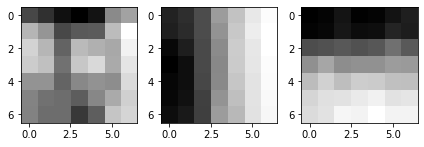

In [24]:
plt.subplot(1,3,1)
plt.imshow(v_1_t[0].reshape(7,7), cmap="gray")
plt.subplot(1,3,2)
plt.imshow(v_1_t[1].reshape(7,7), cmap="gray")
plt.subplot(1,3,3)
plt.imshow(v_1_t[2].reshape(7,7), cmap="gray")
plt.tight_layout()

Last two are similar to the edge detection kernels. Vertical and horizontal kernels, respectively.

### e.

In [25]:
def reconstruct_image(patches):
    patches = patches.reshape(81,7,7)
    
    reconstructed_img = np.zeros(shape=(63,63))
    for patch_id in range(patches.shape[0]):
        row_id = int(patch_id / 9)
        column_id = int(patch_id % 9)
        
        row_start_idx = row_id*7
        row_stop_idx = (row_id+1)*7
        
        column_start_idx = column_id*7
        column_stop_idx = (column_id+1)*7
        reconstructed_img[row_start_idx:row_stop_idx, column_start_idx:column_stop_idx] = patches[patch_id]
        
    return reconstructed_img

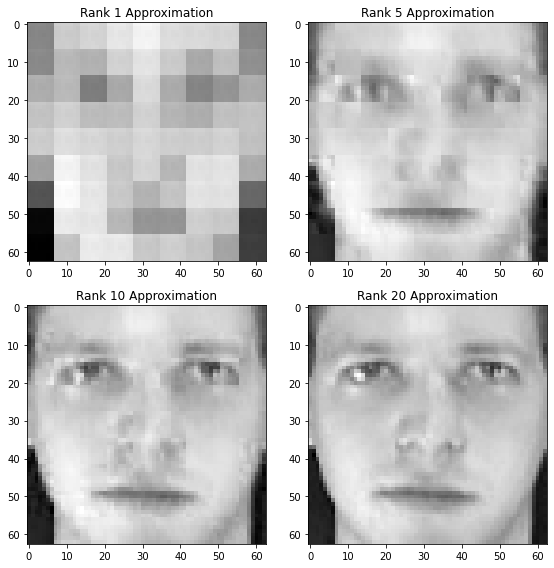

In [26]:
ranks = [1, 5, 10, 20]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for idx, k in enumerate(ranks):
    apprx = np.zeros_like(B_1)
    for i in range(k):
        s_i = s_1[i]
        u_i = u_1[:, i:i+1]
        v_i = v_1_t.T[:, i:i+1]
        apprx = apprx + (s_i * u_i.dot(v_i.T))
    axes[int(idx/2), int(idx%2)].imshow(reconstruct_image(apprx), cmap="gray")
    axes[int(idx/2), int(idx%2)].set_title("Rank {} Approximation".format(k))
plt.tight_layout()

### f.

A gray image with size **63x63** is represented by 63*63 = 3969 parameters. On the other hand, rank-k approximation only stores the k singular values and the k left and right singular vectors (63 parameters for each). Thus in total k-rank approximation stores (63 + 63 + 1) * k parameters. 

In [27]:
orig_params = A_1.shape[0] * A_1.shape[1]

rank_params = [(A_1.shape[0] + A_1.shape[1] +1)*k for k in ranks ]

for k in range(len(ranks)):
    print("Rank {} stores {:.2f} of the original parameters.".format(ranks[k], rank_params[k]/orig_params ))

Rank 1 stores 0.03 of the original parameters.
Rank 5 stores 0.16 of the original parameters.
Rank 10 stores 0.32 of the original parameters.
Rank 20 stores 0.64 of the original parameters.


### g.

$B_{i} = Y_{i}V_{1,(20)}^{T}$ The value of the $Y{i}$ can be estimated using least squares. $B_{i}V_{1,(20)}^{-T} = \hat{Y_{i}}$

In [28]:
u_a_1, s_a_1, v_a_1_t = np.linalg.svd(B_1)
v_1_20 = v_a_1_t.T[:,:20]

In [29]:
Y_2_hat = B_2 @ np.linalg.pinv(v_1_20.T)
Y_3_hat = B_3 @ np.linalg.pinv(v_1_20.T)

Then we can reconstruct $\hat{B_{i}} = \hat{Y_{i}}V_{1,(20)}^{T}$

In [30]:
B_2_hat = Y_2_hat @ v_1_20.T
B_3_hat = Y_3_hat @ v_1_20.T

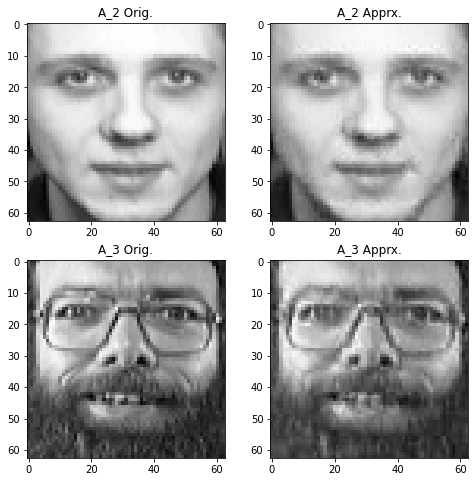

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

axes[0,0].set_title("A_2 Orig.")
axes[0,0].imshow(A_2, cmap="gray")

axes[0,1].set_title("A_2 Apprx.")
axes[0,1].imshow(reconstruct_image(B_2_hat), cmap="gray")

axes[1,0].set_title("A_3 Orig.")
axes[1,0].imshow(A_3, cmap="gray")

axes[1,1].set_title("A_3 Apprx.")
axes[1,1].imshow(reconstruct_image(B_3_hat), cmap="gray")

$A_2$ apprx. worked better because it is similar to the $A_1$ more than $A_3$ does and we took the $V$ matrix from.